# Final Project

1.Research Question
- How has the performance of NFL teams evolved over the past decade in terms of win percentages and offensive metrics?
- How have wins evolved over time for each conference in the NFL?
- What is the relationship between total yards, points, and wins? Which factor—yards or points—has a greater impact on winning?
- How do average points compare between the best and worst teams in the league?
- Which factor, turnover percentage or penalties, has a more significant impact on wins and point differential? What is the effect of turnover percentage on win percentage and point differential?
- Can a regression model be used to accurately predict wins in the NFL?
- What correlations exist between various NFL statistics?
= How are passing yards and rushing yards related across teams?
- How do total snaps influence offensive outcomes?
Investigate the relationship between total snaps and key metrics like yards gained, touchdowns, and total points.

- What is the impact of passing efficiency on team success?
Explore the relationship between pass completion percentage and win percentage, total points, and yards gained.

- How does the frequency of rushing versus passing impact overall team performance?
Compare teams that rely more heavily on rushing or passing in terms of win percentage, yards per snap (yps), and points per game.

- Do teams that excel in no-huddle and shotgun formations score more points?
Examine if teams with higher no-huddle and shotgun usage have better offensive performance (yards gained, touchdowns, points).

- What is the correlation between air yards and total passing yards?
Determine how air yards contribute to overall passing success and offensive productivity.

- Does a higher number of turnovers (fumbles and interceptions) lead to a significant drop in win percentage?
Analyze the impact of turnovers on win percentage and other success metrics like point differential.

- How does a team's home and away performance differ in terms of wins and points scored?
Compare the performance of teams at home vs. away, looking at wins, losses, and points per game.

- Which factors contribute most to a high points per game average?
Identify the strongest predictors of points per game by exploring variables such as pass attempts, rushing yards, and touchdowns.

- Is there a relationship between receiving yards and points scored?
Explore if teams with higher receiving yards tend to score more points or win more games.

- How does win percentage change over time across teams with different offensive strategies?
Track how offensive strategies (e.g., passing-heavy, rushing-heavy) correlate with win percentage trends over multiple seasons.

2.Justification - why is this relevant?
This project is especially relevant with the start of the new 2024 NFL season, as it will allow us to examine changes in team offenses over the past 10 years and provide insights into how teams’ offenses have improved. These findings can also help fans anticipate trends and performances in the upcoming season.

3.Data Sources
NFL dataset 
- https://www.kaggle.com/datasets/philiphyde1/nfl-stats-1999-2022
- https://www.kaggle.com/datasets/nickcantalupa/nfl-team-data-2003-2023/code

4.Libraries Used
- pandas for data manipulation and analysis
- matplotlib and seaborn for visualization
- scikit-learn for any machine learning models or predictions



# Introduction to Dataset and Summary Statistics

## Dataset Overview

In [60]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
from IPython.display import display

# Load the dataset 
df = pd.read_csv('..\Final Project\dataset\yearly_team_data.csv')


# Display the first few rows of the dataframe to get an overview
pd.set_option('display.max_columns', None) # Show all columns
# Clean the 'record' column by stripping leading/trailing whitespace and tabs
df['record'] = df['record'].str.strip()
df.head()

,team,season,total_snaps,yards_gained,touchdown,extra_point_attempt,field_goal_attempt,total_points,td_points,xp_points,fg_points,fumble,fumble_lost,shotgun,no_huddle,qb_dropback,pass_snaps_count,pass_snaps_pct,pass_attempts,complete_pass,incomplete_pass,air_yards,passing_yards,pass_td,interception,targets,receptions,receiving_yards,yards_after_catch,receiving_td,pass_fumble,pass_fumble_lost,rush_snaps_count,rush_snaps_pct,qb_scramble,rushing_yards,run_td,run_fumble,run_fumble_lost,home_wins,home_losses,home_ties,away_wins,away_losses,away_ties,wins,losses,ties,win_pct,record,yps
0,ARI,2012,1013,7595,28,25,25,268,168,25,75,16,10,568,53,676,665,0.66,586,337,249,4862,3383,17,21,586,337,3383,1363,17,10,7,348,0.34,11,1207,11,6,3,4,4,0,1,7,0,5,11,0,0.313,5-11-0,7.50
1,ARI,2013,1020,9855,37,37,30,349,222,37,90,17,9,385,17,622,617,0.60,551,363,188,5284,4291,25,22,551,363,4291,1756,25,9,5,403,0.40,5,1560,12,8,4,6,2,0,4,4,0,10,6,0,0.625,10-6-0,9.66
2,ARI,2014,983,9128,28,27,29,282,168,27,87,13,5,495,17,613,598,0.61,556,320,236,6028,3990,22,12,556,320,3990,1604,22,9,3,385,0.39,15,1326,6,4,2,7,1,0,4,4,0,11,5,0,0.688,11-5-0,9.29
3,ARI,2015,1005,11337,53,53,28,455,318,53,84,16,9,400,11,590,583,0.58,543,353,190,6084,4775,36,13,543,353,4775,1782,36,8,5,422,0.42,7,1946,16,8,4,6,2,0,7,1,0,13,3,0,0.813,13-3-0,11.28
4,ARI,2016,1080,10302,51,43,21,412,306,43,63,25,11,529,51,692,688,0.64,626,383,243,6204,4425,30,17,626,383,4425,1747,30,14,6,392,0.36,4,1739,21,11,5,4,4,1,3,5,0,7,9,1,0.412,7-9-1,9.54


In [34]:
# Print random rows
df.sample(10).T

,168,233,25,55,255,20,127,185,109,353
team,JAX,MIA,BAL,CAR,NE,ATL,DET,KC,DEN,TB
season,2012,2017,2013,2019,2015,2020,2019,2017,2013,2017
total_snaps,993,988,1084,1073,1029,1069,1011,977,1132,1032
yards_gained,8545,8724,8839,9610,10824,10529,9745,10345,12913,10440
touchdown,33,32,32,41,54,40,38,39,74,37
extra_point_attempt,18,26,26,31,52,34,35,40,75,28
field_goal_attempt,25,21,38,25,33,38,26,41,25,25
total_points,291,281,332,352,475,388,341,397,594,325
td_points,198,192,192,246,324,240,228,234,444,222
xp_points,18,26,26,31,52,34,35,40,75,28


### Column Descriptions

| Column Name                | Data Type | Description                                           | Example Values |
|----------------------------|-----------|-------------------------------------------------------|----------------|
| team                       | Object    | The name of the NFL team.                             | "NYG" New York Giants |
| season                     | Int       | The year of the season.                              | 2022           |
| total_snaps                | Int       | Total number of plays (snaps) run by the team.      | 1200           |
| yards_gained               | Int       | Total yards gained by the team during the season.    | 3500           |
| touchdown                  | Int       | Total touchdowns scored by the team.                  | 25             |
| extra_point_attempt        | Int       | Number of extra point attempts.                        | 20             |
| field_goal_attempt         | Int       | Number of field goal attempts made.                   | 15             |
| total_points               | Int       | Total points scored by the team.                      | 275            |
| td_points                  | Int       | Points scored from touchdowns.                         | 150            |
| xp_points                  | Int       | Points scored from extra point attempts.              | 20             |
| fg_points                  | Int       | Points scored from field goals.                       | 45             |
| fumble                     | Int       | Total fumbles committed by the team.                  | 10             |
| fumble_lost                | Int       | Total fumbles lost by the team.                       | 5              |
| shotgun                    | Int       | Number of plays run from a shotgun formation.         | 150            |
| no_huddle                  | Int       | Number of no-huddle plays run by the team.           | 75             |
| qb_dropback                | Int       | Total dropbacks by the quarterback.                   | 400            |
| pass_snaps_count           | Int       | Total number of pass snaps taken.                     | 300            |
| pass_snaps_pct             | Float     | Percentage of snaps that were passing plays.          | 25.0           |
| pass_attempts              | Int       | Total number of passing attempts.                      | 500            |
| complete_pass              | Int       | Total number of completed passes.                      | 350            |
| incomplete_pass            | Int       | Total number of incomplete passes.                    | 150            |
| air_yards                  | Int       | Total air yards gained on passes.                     | 2500           |
| passing_yards              | Int       | Total passing yards gained.                           | 3000           |
| pass_td                    | Int       | Total touchdown passes thrown.                         | 20             |
| interception               | Int       | Total interceptions thrown by the team.               | 10             |
| targets                    | Int       | Total targets for receivers.                           | 400            |
| receptions                 | Int       | Total receptions made by receivers.                    | 350            |
| receiving_yards            | Int       | Total yards gained by receivers.                       | 2800           |
| yards_after_catch          | Int       | Total yards gained after catch by receivers.          | 800            |
| receiving_td               | Int       | Total receiving touchdowns scored.                     | 10             |
| pass_fumble                | Int       | Total fumbles by the quarterback on pass plays.      | 5              |
| pass_fumble_lost           | Int       | Total fumbles lost by the quarterback.                | 2              |
| rush_snaps_count           | Int       | Total number of rush snaps taken.                     | 200            |
| rush_snaps_pct             | Float     | Percentage of snaps that were rushing plays.          | 15.0           |
| qb_scramble                | Int       | Total times the quarterback scrambled.                | 25             |
| rushing_yards              | Int       | Total rushing yards gained.                           | 1500           |
| run_td                     | Int       | Total rushing touchdowns scored.                       | 12             |
| run_fumble                 | Int       | Total rushing fumbles committed.                       | 6              |
| run_fumble_lost            | Int       | Total rushing fumbles lost.                           | 3              |
| home_wins                  | Int       | Total wins at home.                                   | 6              |
| home_losses                | Int       | Total losses at home.                                 | 2              |
| home_ties                  | Int       | Total ties at home.                                   | 0              |
| away_wins                  | Int       | Total wins away.                                      | 5              |
| away_losses                | Int       | Total losses away.                                    | 3              |
| away_ties                  | Int       | Total ties away.                                      | 0              |
| wins                       | Int       | Total wins in the season.                             | 11             |
| losses                     | Int       | Total losses in the season.                           | 5              |
| ties                       | Int       | Total ties in the season.                             | 0              |
| win_pct                    | Float     | Win percentage of the team.                           | 0.688          |
| record                     | Object    | Win-loss-tie record of the team.                      | "5-11-0"       |
| yps                        | Float     | Yards per snap.                                       | 4.8            |


## Summary Statistics

In [17]:
summary_statistics = df.describe(include='all')  # Include all columns, numerical and categorical
summary_statistics = summary_statistics.applymap(lambda x: f'{x:g}' if isinstance(x, (int, float)) else x)

# Display the summary statistics
print("Summary Statistics:")
display(summary_statistics)

Summary Statistics:


,team,season,total_snaps,yards_gained,touchdown,extra_point_attempt,field_goal_attempt,total_points,td_points,xp_points,fg_points,fumble,fumble_lost,shotgun,no_huddle,qb_dropback,pass_snaps_count,pass_snaps_pct,pass_attempts,complete_pass,incomplete_pass,air_yards,passing_yards,pass_td,interception,targets,receptions,receiving_yards,yards_after_catch,receiving_td,pass_fumble,pass_fumble_lost,rush_snaps_count,rush_snaps_pct,qb_scramble,rushing_yards,run_td,run_fumble,run_fumble_lost,home_wins,home_losses,home_ties,away_wins,away_losses,away_ties,wins,losses,ties,win_pct,record,yps
count,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384
unique,32,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,42,nan
top,ARI,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,7-9-0,nan
freq,12,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,37,nan
mean,nan,2017.5,1024.26,9670.45,41.651,36.474,26.5911,366.154,249.906,36.474,79.7734,16.9375,8.02865,642.086,102.25,627.474,602.628,0.588307,548.174,357.094,191.081,4593.27,4032.02,26.9531,13.5755,548.174,357.094,4030.8,1851.66,26.9531,10.0286,5.01562,421.633,0.411693,24.875,1859.2,13.9505,6.90885,3.01302,4.5,3.6224,0.03125,3.59115,4.53125,0.03125,8.09115,8.15365,0.0625,0.496836,nan,9.43904
std,nan,3.45656,52.2525,1050.13,9.11448,9.61419,5.58177,64.7982,54.6869,9.61419,16.7453,4.63512,2.89624,146.949,102.215,58.0605,59.8663,0.0466698,59.2602,46.2316,26.6093,647.379,535.805,7.40319,4.49421,59.2602,46.2316,535.79,311.686,7.40319,3.38044,2.24708,49.8091,0.0466698,14.6382,348.128,5.11182,3.03496,1.78105,1.79497,1.79224,0.17422,1.7912,1.78741,0.17422,3.06578,3.07348,0.242377,0.18944,nan,0.884055
min,nan,2012,866,6761,21,16,8,227,126,16,24,6,1,228,6,486,436,0.45,361,223,131,2898,2598,12,2,361,223,2589,1124,12,2,0,314,0.31,1,1168,3,0,0,0,0,0,0,0,0,0,1,0,0,nan,7.1
25%,nan,2014.75,989,8916.5,35,30,23,319.75,210,30,69,14,6,541.5,45,587.75,560,0.56,504.75,324.75,174,4116.25,3644.75,22,10,504.75,324.75,3643.5,1644.75,22,8,3,386,0.38,14,1616.5,10,5,2,3,2,0,2,3,0,6,6,0,0.375,nan,8.7875
50%,nan,2017.5,1018,9669.5,40,35,27,361,240,35,81,17,8,638,74.5,630,607,0.59,551.5,357,191,4571,4020,26,13,551.5,357,4018,1841,26,10,5,415,0.41,22,1820,13,7,3,5,4,0,4,5,0,8,8,0,0.5,nan,9.385
75%,nan,2020.25,1060.25,10348.2,48,43,30,411,288,43,90,20,10,732.25,123,665,648,0.62,589,384.25,209,5021.25,4388.75,32,16,589,384.25,4388.75,2054.5,32,12,6,456.25,0.44,34,2062.5,17,9,4,6,5,0,5,6,0,10.25,10,0,0.6305,nan,10.02


## Check for missing data

In [20]:
# Checking for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
team                   0
season                 0
total_snaps            0
yards_gained           0
touchdown              0
extra_point_attempt    0
field_goal_attempt     0
total_points           0
td_points              0
xp_points              0
fg_points              0
fumble                 0
fumble_lost            0
shotgun                0
no_huddle              0
qb_dropback            0
pass_snaps_count       0
pass_snaps_pct         0
pass_attempts          0
complete_pass          0
incomplete_pass        0
air_yards              0
passing_yards          0
pass_td                0
interception           0
targets                0
receptions             0
receiving_yards        0
yards_after_catch      0
receiving_td           0
pass_fumble            0
pass_fumble_lost       0
rush_snaps_count       0
rush_snaps_pct         0
qb_scramble            0
rushing_yards          0
run_td                 0
run_fumble             0
run_fumble_lost        0
home_win

## Additional information on dataset

In [21]:
# Additional dataset information (data types, non-null count, etc.)
print("\nDataset Info:") 
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 384 non-null    object 
 1   season               384 non-null    int64  
 2   total_snaps          384 non-null    int64  
 3   yards_gained         384 non-null    int64  
 4   touchdown            384 non-null    int64  
 5   extra_point_attempt  384 non-null    int64  
 6   field_goal_attempt   384 non-null    int64  
 7   total_points         384 non-null    int64  
 8   td_points            384 non-null    int64  
 9   xp_points            384 non-null    int64  
 10  fg_points            384 non-null    int64  
 11  fumble               384 non-null    int64  
 12  fumble_lost          384 non-null    int64  
 13  shotgun              384 non-null    int64  
 14  no_huddle            384 non-null    int64  
 15  qb_dropback          384 

## Additional Summary Statistics:

- Total Games Played: You can derive this from wins, losses, and ties.
- Average Points Per Game: Calculate as total_points / games_played.
- Average Yards Per Snap: Calculate as yards_gained / total_snaps.
- Turnover Ratio: Calculate as (fumble + interception) / total_snaps to understand how turnovers affect the game.
- Passing Efficiency: This could be measured as (passing_yards / pass_attempts) to see the effectiveness of the passing game.
- Rushing Efficiency: Similarly, rushing_yards / rush_snaps_count could be a valuable metric.

In [23]:
df['games_played'] = df['wins'] + df['losses'] + df['ties']
df['avg_points_per_game'] = df['total_points'] / df['games_played']
df['avg_yards_per_snap'] = df['yards_gained'] / df['total_snaps']
df['turnover_ratio'] = (df['fumble'] + df['interception']) / df['total_snaps']
df['passing_efficiency'] = df['passing_yards'] / df['pass_attempts']
df['rushing_efficiency'] = df['rushing_yards'] / df['rush_snaps_count']

summary_statistics = df.describe(include='all')  # Include all columns, numerical and categorical
summary_statistics = summary_statistics.applymap(lambda x: f'{x:g}' if isinstance(x, (int, float)) else x)

# Display the summary statistics
print("Summary Statistics:")
display(summary_statistics)

Summary Statistics:


,team,season,total_snaps,yards_gained,touchdown,extra_point_attempt,field_goal_attempt,total_points,td_points,xp_points,fg_points,fumble,fumble_lost,shotgun,no_huddle,qb_dropback,pass_snaps_count,pass_snaps_pct,pass_attempts,complete_pass,incomplete_pass,air_yards,passing_yards,pass_td,interception,targets,receptions,receiving_yards,yards_after_catch,receiving_td,pass_fumble,pass_fumble_lost,rush_snaps_count,rush_snaps_pct,qb_scramble,rushing_yards,run_td,run_fumble,run_fumble_lost,home_wins,home_losses,home_ties,away_wins,away_losses,away_ties,wins,losses,ties,win_pct,record,yps,games_played,avg_points_per_game,avg_yards_per_snap,turnover_ratio,passing_efficiency,rushing_efficiency
count,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384
unique,32,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,42,nan,nan,nan,nan,nan,nan,nan
top,ARI,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,7-9-0,nan,nan,nan,nan,nan,nan,nan
freq,12,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,37,nan,nan,nan,nan,nan,nan,nan
mean,nan,2017.5,1024.26,9670.45,41.651,36.474,26.5911,366.154,249.906,36.474,79.7734,16.9375,8.02865,642.086,102.25,627.474,602.628,0.588307,548.174,357.094,191.081,4593.27,4032.02,26.9531,13.5755,548.174,357.094,4030.8,1851.66,26.9531,10.0286,5.01562,421.633,0.411693,24.875,1859.2,13.9505,6.90885,3.01302,4.5,3.6224,0.03125,3.59115,4.53125,0.03125,8.09115,8.15365,0.0625,0.496836,nan,9.43904,16.3073,22.4713,9.43906,0.0298257,7.36373,4.38881
std,nan,3.45656,52.2525,1050.13,9.11448,9.61419,5.58177,64.7982,54.6869,9.61419,16.7453,4.63512,2.89624,146.949,102.215,58.0605,59.8663,0.0466698,59.2602,46.2316,26.6093,647.379,535.805,7.40319,4.49421,59.2602,46.2316,535.79,311.686,7.40319,3.38044,2.24708,49.8091,0.0466698,14.6382,348.128,5.11182,3.03496,1.78105,1.79497,1.79224,0.17422,1.7912,1.78741,0.17422,3.06578,3.07348,0.242377,0.18944,nan,0.884055,0.494723,4.02433,0.884089,0.00680455,0.664556,0.450092
min,nan,2012,866,6761,21,16,8,227,126,16,24,6,1,228,6,486,436,0.45,361,223,131,2898,2598,12,2,361,223,2589,1124,12,2,0,314,0.31,1,1168,3,0,0,0,0,0,0,0,0,0,1,0,0,nan,7.1,16,14.1875,7.09781,0.0121335,5.64348,3.20913
25%,nan,2014.75,989,8916.5,35,30,23,319.75,210,30,69,14,6,541.5,45,587.75,560,0.56,504.75,324.75,174,4116.25,3644.75,22,10,504.75,324.75,3643.5,1644.75,22,8,3,386,0.38,14,1616.5,10,5,2,3,2,0,2,3,0,6,6,0,0.375,nan,8.7875,16,19.5,8.78452,0.0252176,6.88198,4.08093
50%,nan,2017.5,1018,9669.5,40,35,27,361,240,35,81,17,8,638,74.5,630,607,0.59,551.5,357,191,4571,4020,26,13,551.5,357,4018,1841,26,10,5,415,0.41,22,1820,13,7,3,5,4,0,4,5,0,8,8,0,0.5,nan,9.385,16,22.0901,9.38335,0.0295207,7.29151,4.38043
75%,nan,2020.25,1060.25,10348.2,48,43,30,411,288,43,90,20,10,732.25,123,665,648,0.62,589,384.25,209,5021.25,4388.75,32,16,589,384.25,4388.75,2054.5,32,12,6,456.25,0.44,34,2062.5,17,9,4,6,5,0,5,6,0,10.25,10,0,0.6305,nan,10.02,17,25.261,10.0202,0.0339308,7.81161,4.67621


In [32]:
# Display the summary statistics
print("Summary Statistics:")
df.describe().T

Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
season,384.0,2017.500000,3.456556,2012.000000,2014.750000,2017.500000,2020.250000,2023.000000
total_snaps,384.0,1024.260417,52.252549,866.000000,989.000000,1018.000000,1060.250000,1181.000000
yards_gained,384.0,9670.447917,1050.132630,6761.000000,8916.500000,9669.500000,10348.250000,12913.000000
touchdown,384.0,41.651042,9.114479,21.000000,35.000000,40.000000,48.000000,74.000000
extra_point_attempt,384.0,36.473958,9.614195,16.000000,30.000000,35.000000,43.000000,75.000000
field_goal_attempt,384.0,26.591146,5.581770,8.000000,23.000000,27.000000,30.000000,41.000000
total_points,384.0,366.153646,64.798179,227.000000,319.750000,361.000000,411.000000,594.000000
td_points,384.0,249.906250,54.686876,126.000000,210.000000,240.000000,288.000000,444.000000
xp_points,384.0,36.473958,9.614195,16.000000,30.000000,35.000000,43.000000,75.000000
fg_points,384.0,79.773438,16.745311,24.000000,69.000000,81.000000,90.000000,123.000000


# Correlations

## Heat Map

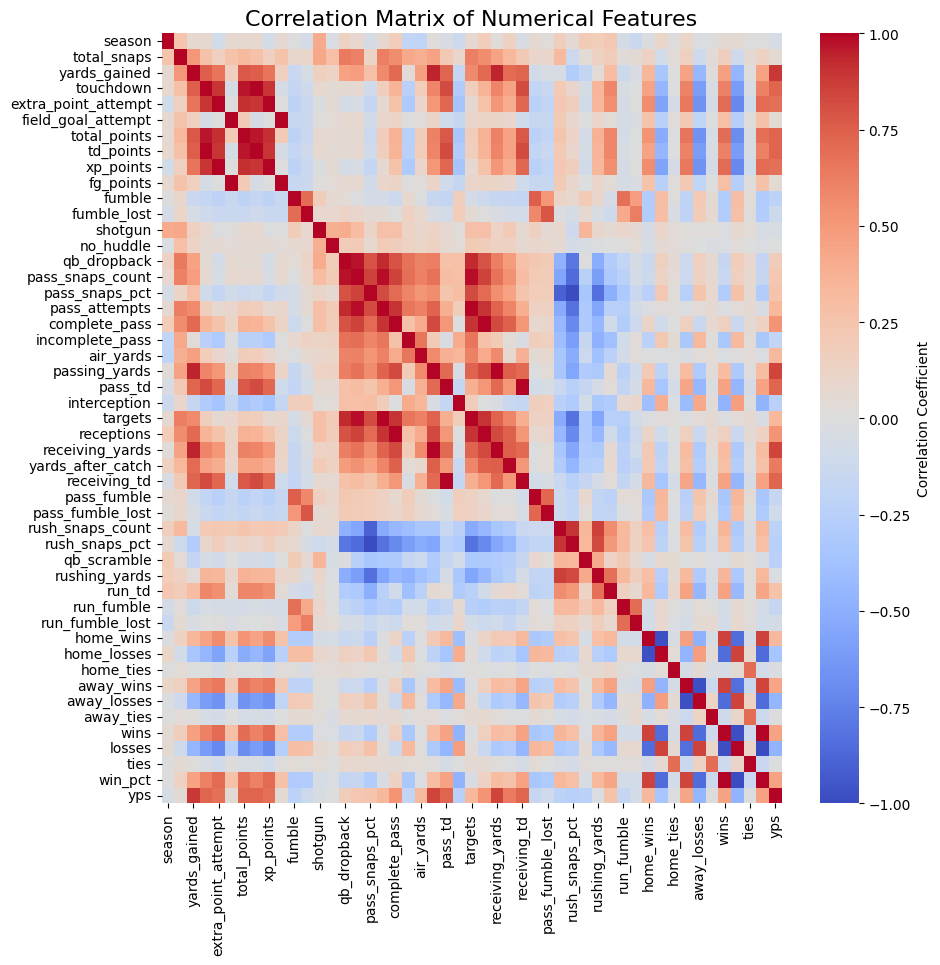

In [41]:
# Create the heatmap

# Select numerical columns
numerical = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(10,10))
sns.heatmap(df[numerical].corr(), cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Correlation Matrix of Numerical Features', fontsize=16)

# Save the plot
plt.savefig('..\Final Project\image\correlation_heatmap.png')

# Display the plot
plt.show()



From the correlation matrix, we can infer several important relationships between the numerical features:

1. **Strong Positive Correlations**:
   - **Passing Yards and Pass Attempts**: These variables are highly correlated, which makes sense since more pass attempts typically result in more passing yards.
   - **Total Points and Touchdowns (TD Points)**: There is a strong correlation here, indicating that touchdowns contribute significantly to the total points scored by a team.
   - **Wins and Win Percentage**: Naturally, these are closely tied, as more wins will result in a higher win percentage.

2. **Negative Correlations**:
   - **Fumbles and Wins**: There appears to be a negative correlation between fumbles (and fumbles lost) and wins, suggesting that teams that commit more fumbles are less likely to win games.
   - **Interceptions and Wins**: Similarly, a higher number of interceptions negatively correlates with wins.

3. **Interesting Relationships**:
   - **Pass Snaps Percent and Passing Yards**: Pass snaps percentage seems to have a moderate positive correlation with passing yards, which shows that teams that pass more frequently tend to gain more yards through the air.
   - **Rush Snaps Percent and Passing Yards**: Conversely, there's a slight negative correlation between rush snaps percent and passing yards, indicating that teams that run the ball more often tend to pass less and gain fewer passing yards.

This analysis helps identify which aspects of a team's offense are most closely associated with success (such as fewer turnovers and more passing yards). Further analysis could involve breaking down these relationships by season or team to explore trends over time.

## Numerical features associated with a team's number of wins, sorted by descending

calculates the correlation between each numerical column in the dataset and the 'wins' column. The correlation indicates how strongly a particular feature is linearly related to the number of wins, with values ranging from -1 (strong negative correlation) to +1 (strong positive correlation). A correlation close to 0 would suggest little to no linear relationship.

In [46]:
df[numerical].corrwith(df['wins']).abs().sort_values(ascending=False)

wins                   1.000000
win_pct                0.996785
losses                 0.990168
home_wins              0.855220
away_wins              0.854557
away_losses            0.853642
home_losses            0.846679
extra_point_attempt    0.707368
xp_points              0.707368
total_points           0.697132
td_points              0.615691
touchdown              0.615691
interception           0.473396
yards_gained           0.464900
run_td                 0.458449
yps                    0.450540
receiving_td           0.449643
pass_td                0.449643
rushing_yards          0.348181
rush_snaps_count       0.348170
pass_fumble            0.330539
incomplete_pass        0.327893
receiving_yards        0.307939
passing_yards          0.306810
pass_fumble_lost       0.300378
rush_snaps_pct         0.288886
pass_snaps_pct         0.288886
fumble                 0.288251
fumble_lost            0.284644
yards_after_catch      0.283803
field_goal_attempt     0.280789
fg_point

In [49]:
# List of columns to drop based on win correlation analysis
columns_to_drop = ['win_pct', 'losses', 'ties', 'home_wins', 'home_losses', 'home_ties', 
                   'away_wins', 'away_losses', 'away_ties', 'season']

# Drop the unnecessary columns for win correlation analysis
df_reduced = df.drop(columns=columns_to_drop)

# Select only the numerical columns that remain in df_reduced
numerical_reduced = df_reduced.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation of the remaining numerical columns with 'wins'
df_reduced[numerical_reduced].corrwith(df_reduced['wins']).sort_values(ascending=False)


wins                   1.000000
extra_point_attempt    0.707368
xp_points              0.707368
total_points           0.697132
td_points              0.615691
touchdown              0.615691
yards_gained           0.464900
run_td                 0.458449
yps                    0.450540
receiving_td           0.449643
pass_td                0.449643
rushing_yards          0.348181
rush_snaps_count       0.348170
receiving_yards        0.307939
passing_yards          0.306810
rush_snaps_pct         0.288886
yards_after_catch      0.283803
field_goal_attempt     0.280789
fg_points              0.280789
total_snaps            0.165675
receptions             0.160574
complete_pass          0.160574
targets               -0.021961
pass_attempts         -0.021961
shotgun               -0.023321
no_huddle             -0.024402
air_yards             -0.027166
qb_scramble           -0.030057
run_fumble            -0.072064
run_fumble_lost       -0.083898
pass_snaps_count      -0.145075
qb_dropb

From the correlation data, the following key points can be inferred about the relationship between various numerical features and the number of wins:

### Strong Positive Correlations:
1. **Extra Point Attempts and XP Points**: Both extra point attempts and extra point (XP) points have a high positive correlation (~0.71) with wins. This suggests that teams that score more touchdowns (leading to more extra point attempts) tend to win more games.
2. **Total Points and Touchdown Points**: Total points (0.697) and touchdown points (0.615) also show strong positive correlations with wins, indicating that scoring more points is highly related to winning games.
3. **Touchdowns (0.615)**: Unsurprisingly, touchdowns themselves are strongly correlated with wins. Teams that score more touchdowns tend to have more victories.
4. **Yards Gained (0.465)**: Total yards gained is positively correlated with wins, showing that teams that accumulate more offensive yards tend to win more games.
5. **Run Touchdowns (0.458) and Yards per Snap (YPS) (0.451)**: Rushing touchdowns and yards per snap also positively correlate with wins, reinforcing the importance of effective offense for success.
6. **Receiving and Passing Touchdowns (~0.45)**: Both receiving and passing touchdowns contribute to more wins, with a moderate positive correlation, emphasizing balanced offensive strength.

### Moderate to Low Positive Correlations:
1. **Rushing Yards (0.348) and Rush Snap Count (0.348)**: These metrics have moderate positive correlations with wins, indicating that while rushing is important, its impact is somewhat less than that of passing and total points scored.
2. **Receiving Yards (0.308) and Passing Yards (0.307)**: These stats show a moderate positive correlation with wins, suggesting that a team's ability to move the ball downfield via the passing game is beneficial, but not as strongly related to winning as points scored.
3. **Field Goal Attempts and Points (~0.28)**: Field goals also contribute to winning, but their impact is less than touchdowns.

### Negative Correlations (Hindering Wins):
1. **Interceptions (-0.473)**: Interceptions have the strongest negative correlation with wins, showing that turnovers have a highly detrimental effect on winning.
2. **Pass Fumble (-0.33) and Fumbles (-0.288)**: Fumbles and lost fumbles, particularly during passing, negatively impact wins, highlighting the importance of ball security.
3. **Incomplete Passes (-0.328)**: This negative correlation shows that incomplete passes can hinder a team's ability to win by stalling offensive drives.
4. **Other Negative Correlations (e.g., Pass Snaps Percentage, Pass Fumbles Lost)**: Various passing-related metrics such as pass fumbles lost and pass snaps percentage also have a negative correlation, further emphasizing the downside of turnovers and inefficient passing plays.

### Insights:
- Scoring more points (total points, touchdowns, extra points) is the strongest indicator of success in winning games.
- Yardage (both passing and rushing) is important but secondary compared to actual scoring.
- Turnovers, particularly interceptions and fumbles, have a highly negative impact on a team's ability to win.
- Balanced offensive production (both passing and rushing touchdowns) correlates well with winning, but minimizing turnovers is crucial.

In summary, efficient scoring and minimizing turnovers are key drivers of winning in the NFL, with strong offenses contributing to more victories while turnovers can severely hinder success.

# EDA & Plot

## Top 5 teams based on total wins and bottom 5 teams based on total loses (line plot)

C:\Users\Kai\AppData\Local\Temp\ipykernel_12816\2387830812.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  filtered_df.groupby(['season', 'team']).sum()['wins'].unstack().plot(kind='line', figsize=(10, 6))


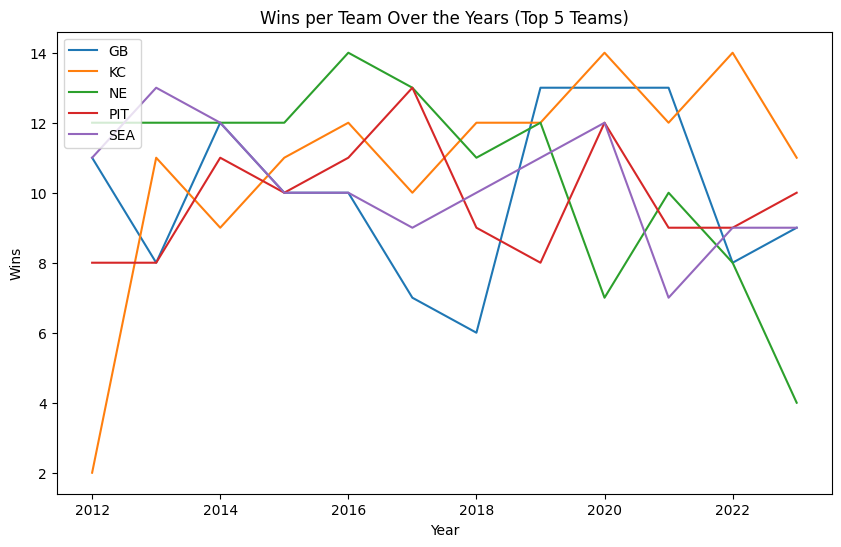

In [54]:
# Top 5
top_teams = df.groupby('team')['wins'].sum().nlargest(5).index

# Filter
filtered_df = df[df['team'].isin(top_teams)]

# Grafics
filtered_df.groupby(['season', 'team']).sum()['wins'].unstack().plot(kind='line', figsize=(10, 6))
plt.title('Wins per Team Over the Years (Top 5 Teams)')
plt.xlabel('Year')
plt.ylabel('Wins')
plt.legend(loc='upper left')
plt.show()

The line chart depicts the performance of five NFL teams (GB, KC, NE, PIT, SEA) from 2012 to 2023 in terms of their number of wins each season.

### Key Observations:
1. **Kansas City Chiefs (KC)**: The Chiefs show a consistent upward trend starting from 2013, peaking around 2020 with the most wins among the teams, before slightly declining in 2023.
2. **Green Bay Packers (GB)**: They exhibit fluctuations with strong performance between 2014 and 2021, but their performance declined sharply in 2022 and 2023.
3. **New England Patriots (NE)**: NE dominated between 2012 and 2019, maintaining consistent high wins, but their performance significantly declined after 2020.
4. **Pittsburgh Steelers (PIT)**: They maintain a relatively consistent but moderate performance, with some fluctuations over the years.
5. **Seattle Seahawks (SEA)**: SEA shows a generally declining trend, particularly in recent years, with their highest performance around 2014-2015.

### General Insights:
- **New England Patriots** and **Kansas City Chiefs** demonstrate dominance for most of the period, with the Chiefs' peak coming more recently, while the Patriots' dominance declines post-2020.
- **Seattle Seahawks** and **Green Bay Packers** have experienced notable declines in recent years.
- The chart highlights the varying consistency across teams, with some like the Chiefs steadily improving while others show more volatility.

This chart effectively visualizes how some NFL teams have risen or fallen over the past decade in terms of wins.

C:\Users\Kai\AppData\Local\Temp\ipykernel_12816\1070455082.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  filtered_df.groupby(['season', 'team']).sum()['wins'].unstack().plot(kind='line', figsize=(10, 6))


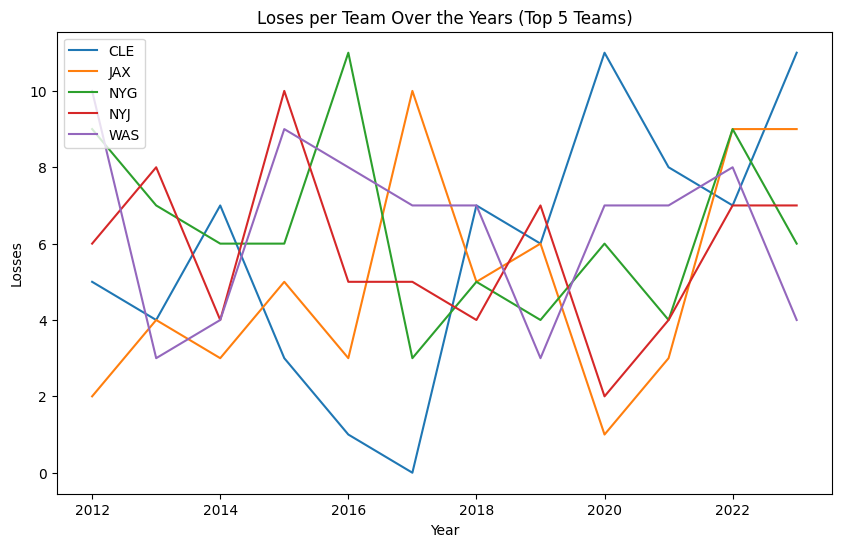

In [57]:
# Top 5
top_teams = df.groupby('team')['losses'].sum().nlargest(5).index

# Filter
filtered_df = df[df['team'].isin(top_teams)]

# Grafics
filtered_df.groupby(['season', 'team']).sum()['wins'].unstack().plot(kind='line', figsize=(10, 6))
plt.title('Loses per Team Over the Years (Top 5 Teams)')
plt.xlabel('Year')
plt.ylabel('Losses')
plt.legend(loc='upper left')
plt.show()

The second line chart visualizes the number of losses for five NFL teams (CLE, JAX, NYG, NYJ, WAS) from 2012 to 2023. Here are the key observations:

### Key Observations:
1. **Cleveland Browns (CLE)**: Their number of losses fluctuates greatly, with a sharp spike in 2017 when they experienced the most losses. They show improvement around 2020 but see another increase in losses by 2023.
2. **Jacksonville Jaguars (JAX)**: JAX displays significant volatility. They had high losses in 2013 and 2020, but also periods of improvement, particularly around 2017 and 2022.
3. **New York Giants (NYG)**: The Giants' losses have remained moderately high, with consistent fluctuations, showing no dramatic improvement or decline.
4. **New York Jets (NYJ)**: NYJ has maintained a consistently high level of losses throughout the period, with occasional dips, but they seem to have been more stable in their struggles.
5. **Washington Football Team (WAS)**: WAS has fluctuated significantly, with notable dips in losses in 2015 and 2021 but more losses in recent years.

### General Insights:
- **Cleveland Browns** stand out for their significant fluctuations, experiencing high losses in certain years (notably 2017) but improving in others.
- **Jacksonville Jaguars** also experience strong volatility, particularly peaking in losses during 2013 and 2020.
- **New York Giants** and **New York Jets** show relatively consistent poor performance with high losses over the years.
- **Washington Football Team** experiences more noticeable ups and downs but manages to avoid the consistent losing seasons seen by the Giants and Jets.

This chart highlights teams that have struggled the most with losses over the years, showcasing volatility and inconsistency in some teams' performance while others remain consistently poor in terms of results.

## Total yards of each team (Box plot)

C:\Users\Kai\AppData\Local\Temp\ipykernel_12816\76092322.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='team', y='yards_gained', data=df, palette='rainbow')


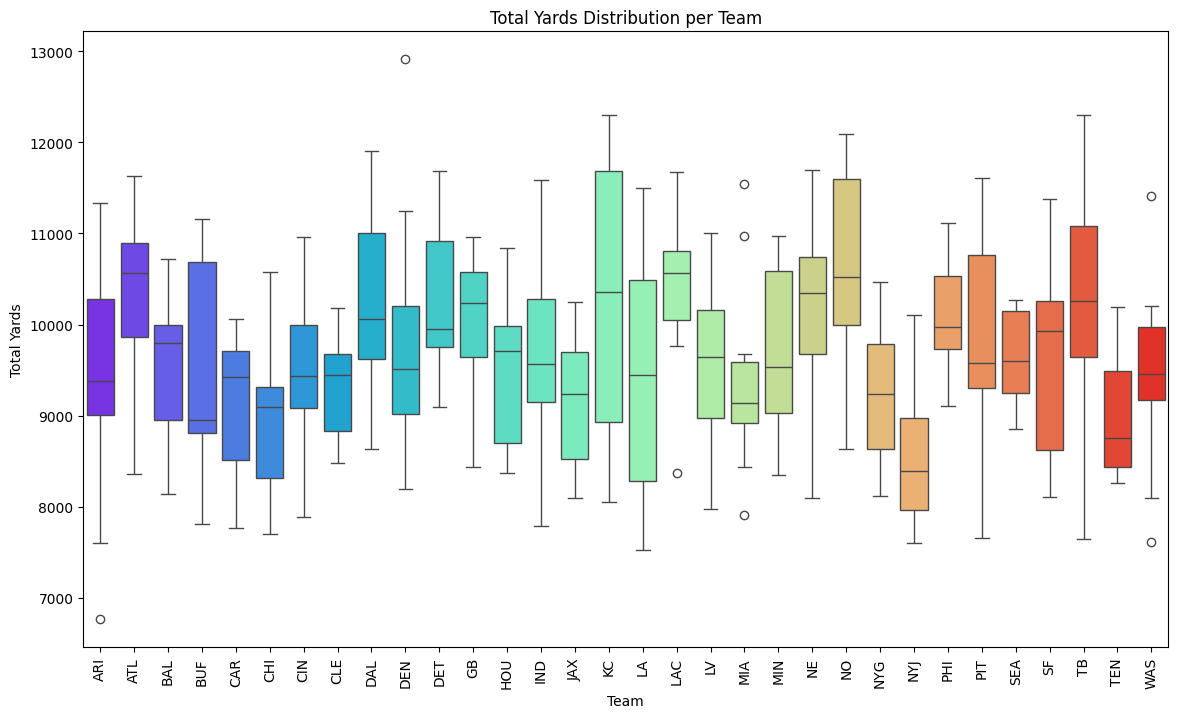

In [64]:
# Plotting total yards distribution per team
plt.figure(figsize=(14,8))
sns.boxplot(x='team', y='yards_gained', data=df, palette='rainbow')
plt.xticks(rotation=90)
plt.title('Total Yards Distribution per Team')
plt.xlabel('Team')
plt.ylabel('Total Yards')
plt.show()

From the boxplot, which shows the distribution of total yards per team, we can infer several things:

1. **Spread and Variation**: Teams with wider boxes (e.g., Kansas City (KC), New Orleans (NO)) tend to have more variability in their total yards over the years, whereas teams with smaller boxes (e.g., Houston (HOU), Detroit (DET)) have more consistent yardage performance.
   
2. **Median Performance**: The middle line in each box represents the median total yards. Teams like Kansas City (KC) and New Orleans (NO) have higher median total yards compared to teams like Arizona (ARI) and Houston (HOU), indicating consistently higher offensive yardage.

3. **Outliers**: Some teams show outliers, represented by the dots outside the whiskers of the box. For example, Arizona (ARI) and Washington (WAS) have lower outlier values, which might indicate particularly poor performance in certain seasons.

4. **Top Performers**: Teams like Kansas City (KC) and New Orleans (NO) are among the top performers in terms of both median total yards and the spread of their performance, consistently reaching higher yard totals over the years.

5. **Teams with Low Yardage**: Teams like Arizona (ARI), Houston (HOU), and Washington (WAS) show lower overall yardage, with smaller interquartile ranges and lower median values, indicating these teams tend to struggle more offensively.

This boxplot visually demonstrates which teams are consistently performing at a higher level offensively and which teams have more variability or struggle to maintain high yardage totals.

## Relation between wins and total yards (Scatter Plot)

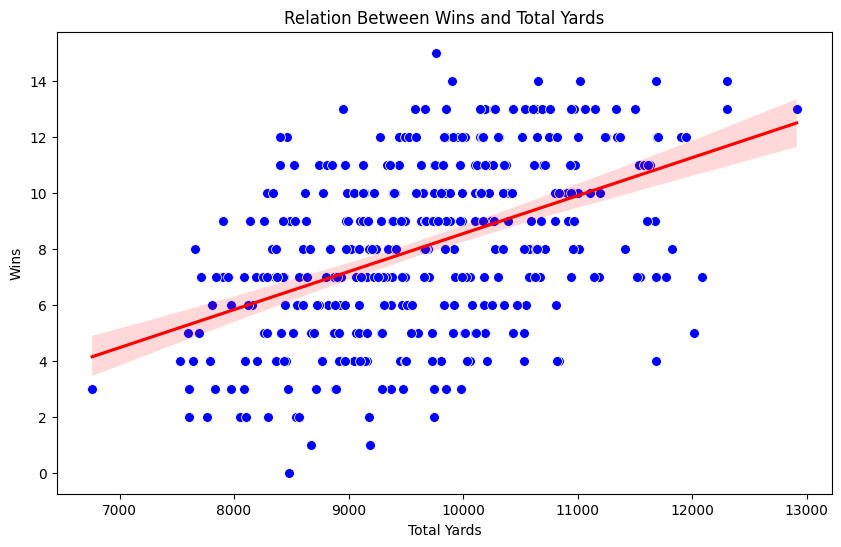

Correlation between Wins and Total Yards: 0.46


In [67]:
# Plotting the relationship between wins and total yards
plt.figure(figsize=(10, 6))
sns.scatterplot(x='yards_gained', y='wins', data=df, color='blue', s=50)

# Adding a regression line to understand the trend
sns.regplot(x='yards_gained', y='wins', data=df, scatter=False, color='red')

# Adding labels and title
plt.title('Relation Between Wins and Total Yards')
plt.xlabel('Total Yards')
plt.ylabel('Wins')

# Show plot
plt.show()

# Calculate the correlation between wins and total yards
correlation = df['wins'].corr(df['yards_gained'])
print(f'Correlation between Wins and Total Yards: {correlation:.2f}')

From the scatter plot and the correlation value of 0.46, we can infer the following:

1. **Moderate Positive Relationship**: A correlation of 0.46 indicates a moderate positive relationship between total yards and wins. This suggests that, in general, teams that gain more total yards tend to win more games, but the relationship is not very strong or absolute.

2. **Not a Perfect Predictor**: While more total yards are associated with more wins, it is clear from the scatter plot that many teams with high total yards still end up with fewer wins, and some teams with lower total yards can also have a decent number of wins. This implies that while yards are important, other factors (like defense, turnovers, penalties) also play a significant role in determining the number of wins.

3. **Wide Distribution**: The points are spread across a wide range, especially for teams with total yards between 8000 to 11000. This indicates variability, where similar yardage can correspond to a different number of wins depending on other circumstances.

4. **Regression Line Insight**: The upward trend of the regression line confirms that as total yards increase, wins generally increase too. However, the points deviate from the line quite a bit, further emphasizing the role of other variables beyond total yards in influencing team success.

In summary, while accumulating more yards contributes to winning games, it is not the sole factor, and the data shows variability that suggests teams must excel in other areas to consistently convert yards into wins.

In [70]:
# Group by team and sum wins
team_wins = df.groupby('team')['wins'].sum().reset_index()

# Sort by wins to get the top and bottom teams
top_5_wins = team_wins.sort_values(by='wins', ascending=False).head(5)
bottom_5_wins = team_wins.sort_values(by='wins', ascending=True).head(5)

# Display the results
print("Top 5 teams with most wins:")
print(top_5_wins)

print("\nBottom 5 teams with least wins (most losses):")
print(bottom_5_wins)


# Group by team and sum the total yards
team_yards = df.groupby('team')['yards_gained'].sum().reset_index()

# Sort by total yards to get the top and bottom teams
top_5_teams = team_yards.sort_values(by='yards_gained', ascending=False).head(5)
bottom_5_teams = team_yards.sort_values(by='yards_gained', ascending=True).head(5)

# Display the results
print("\nTop 5 teams with most total yards:")
print(top_5_teams)

print("\nBottom 5 teams with least total yards:")
print(bottom_5_teams)


Top 5 teams with most wins:
   team  wins
15   KC   130
21   NE   127
27  SEA   123
11   GB   120
26  PIT   118

Bottom 5 teams with least wins (most losses):
   team  wins
14  JAX    60
24  NYJ    69
7   CLE    70
23  NYG    76
31  WAS    77

Top 5 teams with most total yards:
   team  yards_gained
22   NO        128263
17  LAC        124460
1   ATL        123595
29   TB        122988
8   DAL        122958

Bottom 5 teams with least total yards:
   team  yards_gained
24  NYJ        102415
5   CHI        107564
30  TEN        107618
4   CAR        109575
14  JAX        110248


From this data, we can infer the following relationships between total yards gained and wins:

### 1. **Teams with High Wins vs. High Yards:**
- **Top 5 teams with most wins (KC, NE, SEA, GB, PIT)** are notably absent from the list of teams with the most total yards. This suggests that while total yards are important, other factors like defensive performance, special teams, and overall game strategy play a significant role in achieving a high number of wins.
- Teams like **DAL** (Dallas) appear on both the top wins and top total yards lists, showing a strong offensive presence likely contributing to their success.
  
### 2. **Teams with High Yards but Fewer Wins:**
- Teams like **NO** (New Orleans Saints), **LAC** (Los Angeles Chargers), and **ATL** (Atlanta Falcons) appear in the top 5 for total yards but are not in the top 5 for wins. This suggests that these teams may be good at moving the ball but are either inefficient in converting yards to points, or they may have weaknesses in other areas like defense, turnovers, or special teams that prevent them from winning more games.

### 3. **Teams with Low Wins and Low Yards:**
- Teams like **NYJ** (New York Jets) and **JAX** (Jacksonville Jaguars) rank at the bottom in both wins and total yards, confirming that weak offensive performance likely contributes to poor win records. These teams struggle to accumulate yards, which directly correlates with their struggles in winning games.

### 4. **Teams with Low Yards but More Wins:**
- Interestingly, **KC** (Kansas City Chiefs), **NE** (New England Patriots), **SEA** (Seattle Seahawks), **GB** (Green Bay Packers), and **PIT** (Pittsburgh Steelers), despite not appearing in the top total yards, have been very successful in terms of wins. This suggests these teams may compensate for fewer yards with factors like efficient red zone offense, strong defenses, or better turnover margins, highlighting that yards alone are not the sole predictor of success.

### 5. **Bottom Yards vs Bottom Wins:**
- **NYJ** appears at the bottom of both wins and total yards lists, reinforcing the idea that poor offensive production significantly impacts their ability to win games. However, teams like **JAX** and **CHI** appear at the bottom in both lists as well, further emphasizing that low yardage often correlates with fewer wins.

### Conclusion:
While accumulating a lot of total yards tends to help a team's chances of winning, it is not a guaranteed formula for success. Other factors like defense, turnovers, and situational football (such as converting yards into points) can significantly influence a team's win-loss record. Teams with fewer yards can still win games by excelling in these other areas, whereas teams with high yardage may struggle if they lack balance.

## Points difference of each team (Bar plot)
Need to use a different dataset

## Comparison of points and opponent points (Bar Plot)

need more data

## Frequency of penalties per team
need more data

## Relation between passing yards and rushing yards

# number of wins/points/yards needed to be top of coference

## comparison of scoring percentage and turnover percentage

- How has the performance of NFL teams evolved over the past decade in terms of win percentages and offensive metrics?
- How have wins evolved over time for each conference in the NFL?
- What is the relationship between total yards, points, and wins? Which factor—yards or points—has a greater impact on winning?
- How do average points compare between the best and worst teams in the league?
- Which factor, turnover percentage or penalties, has a more significant impact on wins and point differential? What is the effect of turnover percentage on win percentage and point differential?
- Can a regression model be used to accurately predict wins in the NFL?
- What correlations exist between various NFL statistics?
= How are passing yards and rushing yards related across teams?
- How do total snaps influence offensive outcomes?
Investigate the relationship between total snaps and key metrics like yards gained, touchdowns, and total points.

- What is the impact of passing efficiency on team success?
Explore the relationship between pass completion percentage and win percentage, total points, and yards gained.

- How does the frequency of rushing versus passing impact overall team performance?
Compare teams that rely more heavily on rushing or passing in terms of win percentage, yards per snap (yps), and points per game.

- Do teams that excel in no-huddle and shotgun formations score more points?
Examine if teams with higher no-huddle and shotgun usage have better offensive performance (yards gained, touchdowns, points).

- What is the correlation between air yards and total passing yards?
Determine how air yards contribute to overall passing success and offensive productivity.

- Does a higher number of turnovers (fumbles and interceptions) lead to a significant drop in win percentage?
Analyze the impact of turnovers on win percentage and other success metrics like point differential.

- How does a team's home and away performance differ in terms of wins and points scored?
Compare the performance of teams at home vs. away, looking at wins, losses, and points per game.

- Which factors contribute most to a high points per game average?
Identify the strongest predictors of points per game by exploring variables such as pass attempts, rushing yards, and touchdowns.

- Is there a relationship between receiving yards and points scored?
Explore if teams with higher receiving yards tend to score more points or win more games.

- How does win percentage change over time across teams with different offensive strategies?
Track how offensive strategies (e.g., passing-heavy, rushing-heavy) correlate with win percentage trends over multiple seasons.

## comparative analysis of different regression models to predict the number of wins in an NFL dataset based on a set of independent variables (features)

- points: the points scored by the team.
- points_opp: the points allowed by the team (opponent points).
- total_yards: the total yards gained by the team.
- turnovers: the number of turnovers committed by the team.

# Conclusion
- high yardage does not correlate with wins
- low yardage definetly means more loses